# PARCIAL PUNTO 2
Solución de ecuaciones no lineales multivariable

<Figure size 432x288 with 0 Axes>

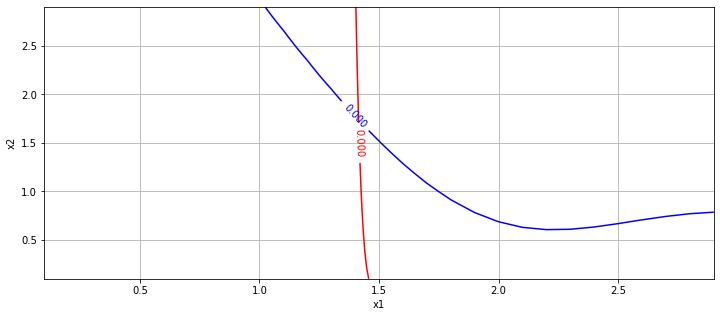

In [31]:
import numpy as np
import matplotlib.pyplot as plt

"""
Grafica e intersección para hallar intervalo.
"""

# definicion de la funcion f1 como ejemplo
def F1(x1, x2):
    return (-2 * (x2 ** (1.0/5.0))) + (x1 * x2) + (0.5 * np.cos(-3.0 * x1))

def F2(x1, x2):
    return 0.5 * (x2 ** (1.0/4.0)) + 5.0 * (np.exp(x1 ** (1.0/2.0))) - 17.0



# grafico de lineas de entorno
x1 = np.arange(0.1, 3.0, 0.1)
x2 = np.arange(0.1, 3.0, 0.1)

# matriz con la combinación de todos los valores
X1, X2 = np.meshgrid(x1, x2)

# graph
plt.figure()
plt.figure(figsize=(12,5))

# f1
C1 = plt.contour(X1, X2, F1(X1, X2), [0.0] , colors='b') # [0.0]  para graficar interseccion == nivel 0
plt.clabel(C1, fontsize=10)

# f2
C2 = plt.contour(X1, X2, F2(X1, X2), [0.0] , colors='r')
plt.clabel(C2, fontsize=10)

plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

# observar la intersección en 0 de la línea azul y la roja
# nos interesa el intervarlo para x1 y x2 donde se intersectan en 0

In [35]:
"""
Solución de sistemas de ecuaciones no-lineales multivariables
"""

# Matriz Jacobiana 
"""
| df1x1  df1x2 |
|              |
| df2x1  df2x2 |
"""
def jacobiano(x1, x2):
    # de la forma mas estupida, se deben saber las derivadas de las funciones
    A = np.zeros([2, 2])
    A[0, 0] = x2 - 1.5 * np.sin(3.0 * x1)
    A[0, 1] = x1 - (0.4 / (x2 ** 0.8))
    A[1, 0] = (2.5 * np.exp(x1 ** 0.5)) / (x1 ** 0.5)
    A[1, 1] = (0.125) / (x2 ** 0.75)
    return A

# puntos iniciales, se toman como aquellos cercanos a la interseccion en 0 vistos en la anterior grafica
x1io = 1.1
x2io = 1.2

# tolerancias de siempre
tol_x = 10**-10
tol_y = 10**-10

# iteraciones
itr = 0

# busqueda de la raiz
while True:
    itr += 1
    
    # matriz jacobaino A ; Ax = b
    A = jacobiano(x1io, x2io)
    
    # vector b ; ax = b
    b = np.zeros([2, 1])
    b[0] = -F1(x1io, x2io)
    b[1] = -F2(x1io, x2io)
    
    # solucionar Ax = b ; se puede utilizar Gauss, Gauss-Jordan o numpy linalg solve
    delta_x = np.linalg.solve(A, b)
    
    # raiz candidata haciendo xi = xi-1 + deltax
    x1 = np.float(x1io + delta_x[0])
    x2 = np.float(x2io + delta_x[1]) 
    
    # evalucion de criterios de paradas
    if np.abs(x1 - x1io) <= tol_x and np.abs(x2 - x2io) <= tol_x: 
        break
    if np.abs(F1(x1, x2)) <= tol_y and np.abs(F2(x1, x2)) <= tol_y:
        break
        
    # actualizacion de los puntos inciales
    x1io = x1
    x2io = x2

# soluciones
print(f"Multivariables - raiz x1: {x1:0.8f}")
print(f"Multivariables - raiz x2: {x2:0.8f}")
print(f"Multivariables - iteraciones: {itr}")

Multivariables - raiz x1: 1.41471758
Multivariables - raiz x2: 1.73856583
Multivariables - iteraciones: 4


# PARCIAL PUNTO 1 Interpolación por Splines Cúbicos
Construcción de sub-polinomios a partir de un conjunto de puntos.

[1990. 1991. 1993. 1995. 1998. 2001. 2002. 2005. 2009. 2012. 2014. 2017.]

[10.62 10.63 10.5  10.44  9.89  9.1   9.02  9.19  9.06  8.79  8.59  8.3 ]

Año	           Natural            	          Not-a-knot          	           Clamped            	
1994	              10.47422962	              10.47558553	              10.47339936	
1999	               9.59222920	               9.59238999	               9.59212176	
2004	               9.11878391	               9.11877653	               9.11856458	
2007	               9.19090603	               9.19098422	               9.19214220	
2011	               8.88553793	               8.88531076	               8.88210236	


<Figure size 432x288 with 0 Axes>

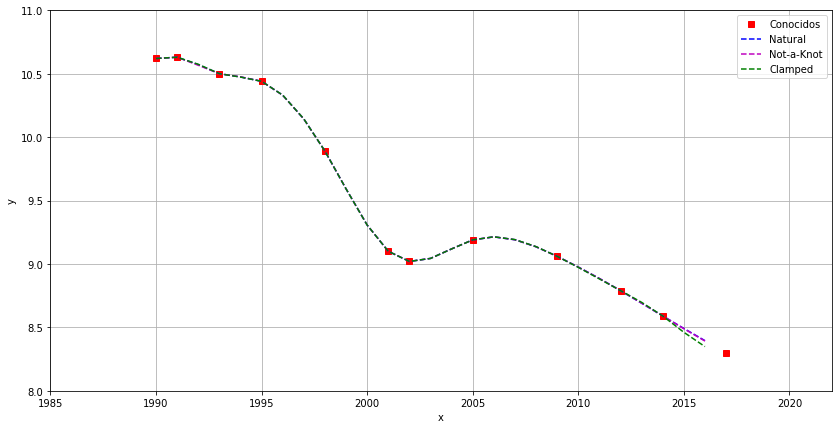

In [24]:

"""
PUNTO 1
"""


import numpy as np
import matplotlib.pyplot as plt
##
import scipy.interpolate as interpol
import struct

x_file_name = "data_x_smoke.bin"
y_file_name = "data_y_smoke.bin"

valores_x = []
valores_y = []

with open(x_file_name, 'rb') as f:
    x = f.read()
    valores_x = np.array(struct.unpack("d"*int(len(x)/8), x))  # double
    
with open(y_file_name, 'rb') as f:
    y = f.read()
    valores_y = np.array(struct.unpack("d"*int(len(y)/8), y)) 
    
# Puntos conocidos
Xi = np.array(valores_x)
Yi = np.array(valores_y)

print(Xi)
print("")
print(Yi)


# Splines Natural :: segunda derivada a cero en los puntos extremos
f1Nat = interpol.CubicSpline(Xi, Yi, bc_type="natural")

# Splines Not - a - knot :: igualdad de terceras drivadas en el segundo y penultimo punto. (se necesitan al menos 4 puntos)
f1Nak = interpol.CubicSpline(Xi, Yi, bc_type="not-a-knot")

# Splines Clamped, con valor k=0 :: primera derivada en los puntos extremos igual a un valor definido k
f1Clam = interpol.CubicSpline(Xi, Yi, bc_type="clamped")

"""
Gráfica de polinomios resultantes
"""

# rango
Xp = np.arange(Xi[0], Xi[-1],  1)

plt.figure()
plt.figure(figsize=(14,7))

plt.plot(Xi, Yi, 'sr')

plt.plot(Xp, f1Nat(Xp), '--b')
plt.plot(Xp, f1Nak(Xp), '--m')
plt.plot(Xp, f1Clam(Xp), '--g')

plt.xlim([1985, 2022])
plt.ylim([8, 11])

plt.xlabel("x")
plt.ylabel("y")

plt.legend(["Conocidos", "Natural", "Not-a-Knot", "Clamped"])
plt.grid(1)

###

valores_pregunta = [1994, 1999, 2004, 2007, 2011]

print()
print("Año\t{:^30s}\t{:^30s}\t{:^30s}\t".format("Natural", "Not-a-knot", "Clamped"))
for i in valores_pregunta:
    print("{:d}\t{: 25.08f}\t{: 25.08f}\t{: 25.08f}\t".format(i, f1Nat(i), f1Nak(i), f1Clam(i) ))
    
    
    


# PARCIAL PUNTO 3

[  2.          15.09814066 111.07974829]


<Figure size 432x288 with 0 Axes>

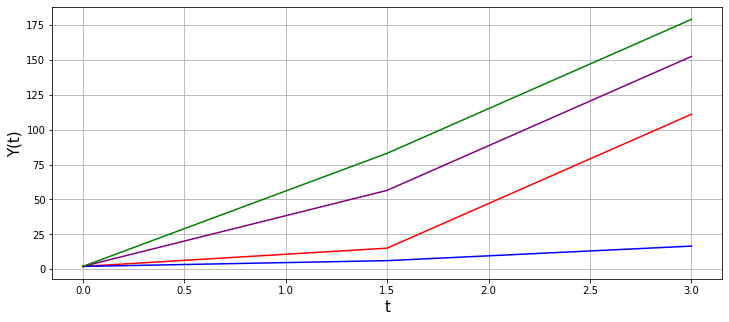

In [52]:


"""
PUNTO 3
"""


import numpy as np
import matplotlib.pyplot as plt

"""
Euler Forward & RK
"""

Y0 = 2.0

# funcion f(t, y) que depende unicamente de y
def f1(t):
    r = 0.0124125
    M = 64
    A = (M - Y0) / Y0
    return M / (1 + ( A * np.exp(-r * M * t) ))

# valores
h = 1.5 # entre menor sea h, más se acerca la solución a la analítica
To = 0.0
Tf = 3.0

# tiempo
T = np.arange(To, Tf + h, h)

# valores estimados de Y(t) en cada iteracion
YEulerFor = np.zeros(len(T)) # forward
YRK2 = np.zeros(len(T)) # runge kutta 2
YRK4 = np.zeros(len(T)) # runge kutta 4

# valor inicial Y(t)
YEulerFor[0] = Y0
YRK2[0] = Y0
YRK4[0] = Y0

# iteracion
for i in range(1, len(T)):
    # forward
    YEulerFor[i] = YEulerFor[i - 1] + h * f1(YEulerFor[i-1])
    
    # runge kutta 2
    k1 = f1(YRK2[i-1])
    k2 = f1(YRK2[i - 1] + k1 * h)
    YRK2[i] = YRK2[i-1] + (h/2.0) * (k1 + k2)
    
    # runge kutta 4
    k1 = f1( YRK4[i-1])
    k2 = f1(YRK4[i-1] + 0.5 * k1 * h)
    k3 = f1(YRK4[i-1] + 0.5 * k2 * h)
    k4 = f1(YRK4[i-1] + k3 * h)
    YRK4[i] = YRK4[i-1] + (h/6.0) * (k1 + 2.0 * k2 + 2.0 * k3 + k4)

"""
Gráfica
"""
plt.figure()
plt.figure(figsize=(12,5))

plt.plot(T, YEulerFor, "r") # se va por debajo del analitico
plt.plot(T, f1(T), "b") # se va por debajo del analitico
plt.plot(T, YRK2, "purple") # runge kutta 2 -- se va por debajo de analitica pero por arriba de forward
plt.plot(T, YRK4, "green") # runge kutta 4 -- por debajo de analitica pero mucha mas cercano al analitica que RK2

plt.xlabel("t", fontsize=15)
plt.ylabel("Y(t)", fontsize=15)
plt.grid(1)

"""
Conclusión
La solución estimada con el método de RK4
es la que más se acerca a la obtenida
con la solución analítica.
"""

"""
PUNTO PARCIAL
"""

print(YEulerFor)
